# **Titanic: Machine Learning from Disaster**


# **Table of Contents**
1. [INTRODUCTION](#intro)
2. [EDA](#eda)
    1. [Import de las librerias](#import)
    2. [Lectura de dataset y explicacion de variables](#lectura)
    3. [Analisis previo de las variables](#previo)
    4. [Analisis profunda de variables](#profundidad)
        1. [PassengerId : Identificador del pasajero](#PassengerId)
        1. [Pclass : Clase del pasajero](#Pclass)
        1. [Name : Nombre del pasajero](#Name)
        1. [Sex : Sexo del pasajero](#Sex)
        1. [Age : Edad del pasajero](#Age)
        1. [SibSp : Number of passenger siblings/spouses](#SibSp)
        1. [Parch : Number of passenger parents/childs](#Parch)
        1. [Ticket : Ticket del pasajero](#Ticket)
        1. [Fare : Coste de la cabina del pasajero](#Fare)
        1. [Cabin : Number of the cabine passengers](#Cabin)
        1. [Embarked : Name of the embarked passengers](#Embarked)
        1. [Survived : Class predicted](#Survived)

## **INTRODUCTION**
<a id="intro"></a>

![alt text](https://www.ecestaticos.com/imagestatic/clipping/26e/bcf/26ebcf2a63d0b63123e145d395075ea9/la-verdadera-historia-de-como-se-encontro-el-titanic.jpg "Logo Title Text 1")

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with a iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.  
Con esta breve introduccion de la historia de este dataset, se va a explicar el objetivo que se quiere obtener con este analisis, primero es obtener mayor conocimiento de las variables que se tuvieron en cuenta para poder saber que dependiero para que una persona sobreviviera en el **Titanic** y finalmente conseguir un modelo predictivo que sea capaz acertar con gran certeza si una persona sera capaz de sobrevivir o no.  
Para ello este dataset esta separado en **Training** y **Test** para evaluar la tasa de acierto de nuestro modelo.  

## **EDA**
<a id="eda"></a>

### **Import de las librerias**
<a id="import"></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #plots
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 30)#max columns to 30

### **Lectura de dataset y explicacion de variables**
<a id="lectura"></a>

In [3]:
#lectura del dataset train y test
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
print(train_df.columns.values)
print('_'*40)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
________________________________________


This dataset have 12 colummns, which are:
* PassengerId :  This variable is an identifier.
* Pclass :  This variable muestra la clase que pertenece el pasajero.
* Name :  This variable show the name of the passengers.
* Sex :   This variable show the sex of the passengers.
* Age :  This variable show age of the passengers.
* SibSp :  This variable show he number of passenger siblings/spouses,
* Parch :  This variable number of passenger parents/childs.
* Ticket :  This variable show the name of the ticket passengers.
* Fare :  This variable show the cost of the cabin.
* Cabin : This variable show the number of the cabine passengers.
* Embarked : This variable show the name of the embarked passengers.
* Survived :  This variable is the class that I want predict, which show if one person survived or no.

### **Analisis previo de las variables**
<a id="previo"></a>

Se va a realizar unas transformacion de los tipos de datos antes visualizar la descripcion de todos los atributos del dataset para obtener una vision de estos con mayor detalle.  
Para empezar se va a realizar una tranformación del atributo Survived el cual is int and the values is 0 or 1(0=Not Survived, 1=Survived), se va ha realizar una conversion a True o False, el cual significa True= supervivencia y False=muerte.

In [4]:
train_df["Survived"]=train_df["Survived"].astype('bool')

Luego los demas atributos categoricos, se van a transformar de tipo object a category para poder tener una descripcion detallada de forma de categoria y no de objeto.

In [5]:
train_df["Pclass"]=train_df["Pclass"].astype('category')
train_df["Sex"]=train_df["Sex"].astype('category')
train_df["Cabin"]=train_df["Cabin"].astype('category')
train_df["Ticket"]=train_df["Ticket"].astype('category')
train_df["Embarked"]=train_df["Embarked"].astype('category')
train_df.info()
train_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null category
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: bool(1), category(5), float64(2), int64(3), object(1)
memory usage: 80.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,False,3.0,"Olsson, Miss. Elina",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,549,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


This dataset have 12 colummns, which are:
* PassengerId : This variable is int, so it is a counter the passenger and we know that there are 891 total rows.
* Pclass : This variable is category and the range is 0 to 3, so I think that this variable show the class of the passengers and it is very important because the passenger with high class had more probability to survive.La clase mas representativa del dataset es la tercera clase con un total de 491 pasajeros, es decir un 55% del barco.
* Name :  This variable is a object and it show the name of the passengers and this variable not is important to know if one person survived o not, ademas cada pasajero tiene un nombre distinto, por lo tanto no podemos sacar nada en común.
* Sex :   This variable is a category and this variable is important because if you were female, you had more probability to survive that male. El sexo masculina representaba la mayoria de los pasajeros del barco, para ser exacto 577 pasajeros eran masculinos, que es casi un 65% de los pasajeros. 
* Age : This variable is int and the range is 0 to 80, so in the TItanic there was babys and aged, this variable is very important because the passengers younger had more probability to survive that olders. El 75% de los pasajeros rondan sobre los 38 años y esta metrica tiene una gran desviacion tipica, por lo tanto no se concentra la edad de la poblacion un pequeño rango, es decir la métrica es muy dispersa, ademas tiene 177 valores nulos en el dataset.
* SibSp : This variable is int and the range is 0 to 8 y el 75% de los pasajeros solamente tenian un conyuge o hermano.
* Parch : This variable is int and the range is 0 to 6 and y el 75% de los pasajeros no tenian padres o hijos. I don't know that this metric is important, saldremos de duda mas adelante cuando hagamos un analizar con mayor detalle.
* Ticket : This variable is a category y el valor mas frecuente es la cabina "CA. 2343", cuyo camarote fue compartirdo por 7 familiares.
* Fare : This variable is int and the range is 0 to 512, el 75% de la poblacion pagaron una media de 31 de tarifa, esto se debe a que el 75% del barco era tambien de 3º clase.
* Cabin : This variable is category, la categoria mas fecuente es "B96 B98" con 4, por lo tanto esa cabina tenia 4 pasajeros I don't know that this variable is important, because there are much nulls values, para ser exacto tiene 687 valores nulos que equivale al 77% del dataset, por lo tanto este valor introduce bastante inconsistencia al dataset.
* Embarked : This variable is category, el lugar mas frecuente de embarcación fue Southampton con 644 pasajeros, el cual representa el 72% de los pasajeros.
* Survived : This variable is a boolean, it is the class that I want predict, which show if one person survived or no. Ademas con esta descipcion se observa que la mayoria del dataset ha sobrevivido para ser exactos 549 pasajeros, por lo tanto 61% del dataset sobrevivieron.Esto luego puede acarrear un breve problema de un dataset un poco desbalanceado pero no es tan agrasevio como otros datasets desbalanceados de 99% de un clase y 1% otra clase.

### **Analisis profunda de variables**
<a id="profundidad"></a>

Con anterioridad se ha obtenido una informacion previode la mayoria de los pasajeros que eran de 3º clase, sexo masculino, mediana edad, apenas tenian familiares, embarcaron de Southampton. Ademas la mayoria de los pasajeros de este dataset sobrevivieron.  
Ahora se va a realizar un analisis con profundidad de cada variable del dataset y sacar informacion con mayor interes.

#### **PassengerId : Identificador del pasajero**
<a id="PassengerId"></a>

Este atributo no es necesario en profundidad ya que directamente como dice el nombre es un identificador, y por lo tanto es un valor nulo que no da informacion al dataset, sino que es un contador de filas del dataset.

#### **Pclass : Clase del pasajero**
<a id="Pclass"></a>

Como se ha mencionado anteriormente este atributo muestra la clase del pasajero del Titanic, el cual deberia ser bastante interesante ya que segun la logica de los botes de emergencia tenian prioridad las personas de primera clase mientras el resto de clases no tenian prioridad y directamente eran descartados para tales botes.  
Para ello se va a realizar un analisis de profundidad de tal atributo para saber que informacion muestra del dataset.  
Se va a realizar la media del atributo Supervivencia agrupando por el atributo Clase de pasajero, como se sabe que si el valor Supervivencia es igual a True es que sobrevivio, por lo tanto la clase que tenga mayor media, significara que esa clase tiene mas supervivientes.

In [6]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Por lo que se ve se cumple la logica que se ha mencionado anteriormente, es decir la personas de primera clase son las personas que tuvieron mayor tasa de supervivencia, el triple que los pasajeros de 3º clase.  
Ademas de esto, se va a mostrar estos datos pero a nivel visual y teniendo en cuenta los pasajeros que hayan sobrevivido o no, con lo que sea mas facil interpretar este atributo.

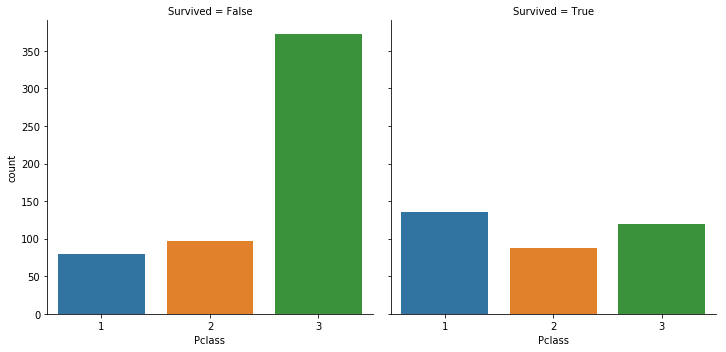

In [92]:
g = sns.catplot('Pclass', col='Survived', data=train_df, kind='count')

Por lo que se puede evaluar por estos resultados visuales y numericos, ha demostrado que la logica que supuse de haber mayor supervivencia los pasajeros de primera clase, es cierta, ya que por lo que se visualiza la clase que ha tenido mayor tasa de supervivencia es la primera, luego la segunda y finalmente la tercera. Siendo la primera clase la que tiene mayor tasa de supervivencia. Ademas se puede visualizar que hay mas personas personas procedentes de 3º clase que de primera.  
Teniendo en cuenta solamente el numero de supervivientes sin observar el total de pasajero de cada clase, el numero de superviventes de 3º clase es mayor que la de 2º clase.  
Ahora se va a visualizar el porcentaje de pasajeros de cada clase para ver las proporciones que tenemos de pasajeros en funcion de su clase perteneciente.

In [93]:
group_by=train_df[['Pclass', 'PassengerId']].groupby(['Pclass'], as_index=False).count()
group_by=group_by['PassengerId'].tolist()
percent=[(x / sum(group_by)*100) for x in group_by]
d = {'Pclass': [1, 2,3], '% Percent.': percent}
dataframe=pd.DataFrame(data=d)
dataframe

,Pclass,% Percent.
0,1,24.242424
1,2,20.650954
2,3,55.106622


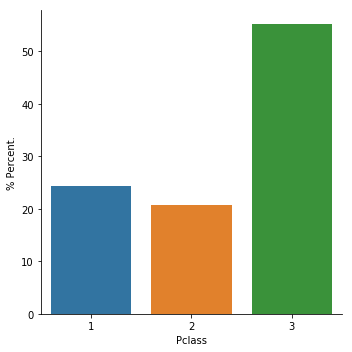

In [89]:
g = sns.catplot(x='Pclass',y='% Percent.' ,data=dataframe,kind="bar")

Como se visualiza la myoria de los pasajeros es de 3º clase, para ser mas exactos el 55% de la tripulacion era de 3º clase, luego tenemos el 24% de la tripulación es de primera clase y finalmente un 20% es de 2º clase.

#### **Name : Nombre del pasajero**
<a id="Name"></a>

Este atributo no es necesario en profundidad ya que directamente como dice el nombre es un identificador de la persona, y por lo tanto es un valor nulo que no da informacion al dataset, sino que ocurre como el antributo PassengerId.

#### **Sex : Sexo del pasajero**
<a id="Sex"></a>

Como se ha mencionado anteriormente este atributo muestra el sexo del pasajero del Titanic, el cual deberia ser bastante interesante ya que segun la logica de los botes de emergencia tenian prioridad las personas con sexo femenino frente a los hombres
Para ello se va a repetir el analisis de profundidad de tal atributo y averiguar si se cumple la logica de que sobreviven mas las mujeres que los hombres, como se ha realizado previamente al atributo **Pclass**.  
Se va a realizar la media del atributo Supervivencia agrupando por el atributo Sexo de pasajero, como se hizo previamente y luego averiguar la proporcion de hombres y mujeres en la tripulacion.

In [31]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Por lo que se puede evaluar, en este caso se cumple la logica que se tiene del caso del titanic, es que las mujeres tenian 6 veces mas probabilidad de sobrevivir que los hombres como se ve claramente, 74% de supervivencia si eras del sexo femenino mientras si eras del sexo masculino solamente tenias un 18% de supervivencia.  
Ahora se va a visualizarlo de forma grafica para aclararlo mejor.

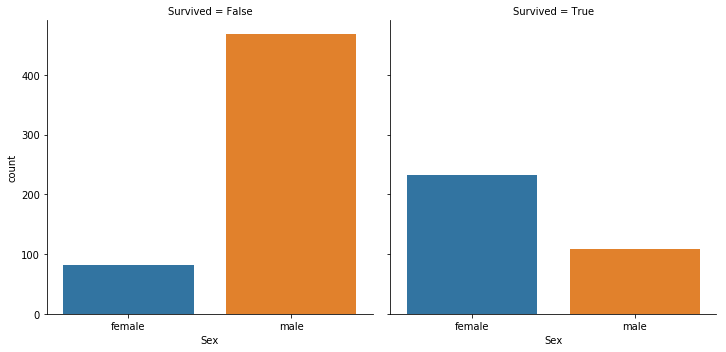

In [90]:
g = sns.catplot('Sex', col='Survived', data=train_df, kind='count')

Como se puede ver, la tripulacion del sexo femenino tenian un gran numero de supervivientes mientras los hombres tienen menos de la mitad, y claramente cuando se fijan en el caso de muerte la diferencia entre el sexo masculino con el femenino es grandisimo, asi que esta claro que que si fueramos una pasajero de sexo femenino conseguiriamos tener mas claro que podriamos sobrevivir mientras que siendo un hombre deberiamos tener suerte para sobrevivir de este desastre.  
Ahora se va a visualizar el porcentaje de pasajeros de cada sexo para ver las proporciones que tenemos de pasajeros en funcion de su sexo.

In [97]:
group_by=train_df[['Sex', 'PassengerId']].groupby(['Sex'], as_index=False).count()
group_by=group_by['PassengerId'].tolist()
percent=[(x / sum(group_by)*100) for x in group_by]
d = {'Sex': ["Female","Male"], '% Percent.': percent}
dataframe=pd.DataFrame(data=d)
dataframe

,Sex,% Percent.
0,Female,35.241302
1,Male,64.758698


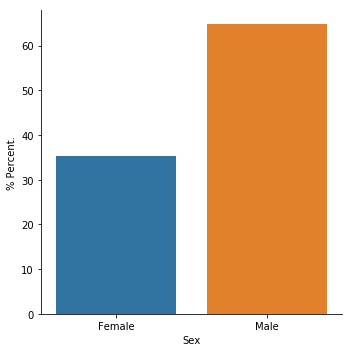

In [99]:
g = sns.catplot(x='Sex',y='% Percent.' ,data=dataframe,kind="bar")

Por lo que se puede observar en este visualización y sus valores de procentajes, la mayoria de la tripulación esta compuesta por el sexo masculino y la diferencia es casi del doble y por lo tanto, es compresible el procentaje de hombres vivos ya que por lo minimo se podrian sobrevivir algunos por la clase perteneciente (1º clase).

#### **Age : Edad del pasajero**
<a id="Age"></a>

#### **SibSp : Number of passenger siblings/spouses**
<a id="SibSp"></a>

#### **Parch : Number of passenger parents/childs**
<a id="Parch"></a>

#### **Ticket : Ticket del pasajero**
<a id="Ticket"></a>

#### **Fare : Coste de la cabina del pasajero**
<a id="Fare"></a>

#### **Cabin : Number of the cabine passengers**
<a id="Cabin"></a>

#### **Embarked : Name of the embarked passengers**
<a id="Embarked"></a>

#### **Survived : Class predicted**
<a id="Survived"></a>